<a href="https://colab.research.google.com/github/bhargav-borah/House-Price-Prediction-Model/blob/main/polynomial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Linear Regression

## Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the cleaned data set

In [5]:
dataset = pd.read_csv('housing_clean.csv')

In [6]:
dataset = dataset.drop(columns=['Unnamed: 0'])

## Extracting the Features and the Dependent Variable from the DataFrame

In [7]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


In [8]:
X = dataset.drop(columns=['median_house_value'])
y = dataset['median_house_value']

## Splitting the data set into the Training set and the Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Training the Model

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [11]:
print('Intercept = ', regressor.intercept_)
print('Coefficients = ', regressor.coef_)

Intercept =  -14719.852534033038
Coefficients =  [-4.65944778  4.92995294  5.45081546 ...  0.          0.
  0.03027048]


## Pedicting the Results

### Training set

In [13]:
y_pred_train = regressor.predict(poly.fit_transform(X_train))
performance_train = pd.DataFrame({'ACTUAL VALUES': y_train, 'PREDICTIONS': y_pred_train})
performance_train

,ACTUAL VALUES,PREDICTIONS
19226,381300.0,356996.045623
14549,329300.0,315006.391466
9093,185400.0,132570.303445
12213,500001.0,287427.523065
12765,97500.0,106944.015130
...,...,...
13123,144600.0,140710.721628
19648,159400.0,106166.763208
9845,289300.0,333866.547387
10799,484600.0,380048.228226


### Test set

In [14]:
y_pred_test = regressor.predict(poly.fit_transform(X_test))
performance_test = pd.DataFrame({'ACTUAL VALUES': y_test, 'PREDICTIONS': y_pred_test})
performance_test

,ACTUAL VALUES,PREDICTIONS
14740,136900.0,110835.420406
10101,241300.0,260079.950411
20566,200700.0,151070.483864
2670,72500.0,75438.653313
15709,460000.0,352822.996644
...,...,...
13132,121200.0,80477.371159
8228,137500.0,202869.314986
3948,160900.0,234399.213957
8522,227300.0,282601.824372


## Model Evaluation

In [15]:
from sklearn.metrics import r2_score

### Training set

In [16]:
r_squared_train = r2_score(y_train, y_pred_train)
print('R-squared = ', r_squared_train)

R-squared =  0.7997541176768139


In [17]:
print('Adjusted R-squared = ', 1 - (1-r_squared_train)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  0.7992872533698626


### Test set

In [18]:
r_squared_test = r2_score(y_test, y_pred_test)
print('R-squared = ', r2_score(y_test, y_pred_test))

R-squared =  -3.8357007340656946


In [19]:
print('Adjusted R-squared = ', 1 - (1-r_squared_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  -3.846974953768199


In [26]:
# Negative R-squared and adjusted R-squared indicate that the predictions are totally useless

## Visualising the Predictions

### Training set

In [20]:
performance_train['ERROR'] = performance_train['ACTUAL VALUES'] - performance_train['PREDICTIONS']
performance_train.reset_index(drop=True, inplace=True)
performance_train.reset_index(inplace=True)
performance_train

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,381300.0,356996.045623,24303.954377
1,1,329300.0,315006.391466,14293.608534
2,2,185400.0,132570.303445,52829.696555
3,3,500001.0,287427.523065,212573.476935
4,4,97500.0,106944.015130,-9444.015130
...,...,...,...,...
15475,15475,144600.0,140710.721628,3889.278372
15476,15476,159400.0,106166.763208,53233.236792
15477,15477,289300.0,333866.547387,-44566.547387
15478,15478,484600.0,380048.228226,104551.771774


<BarContainer object of 15480 artists>

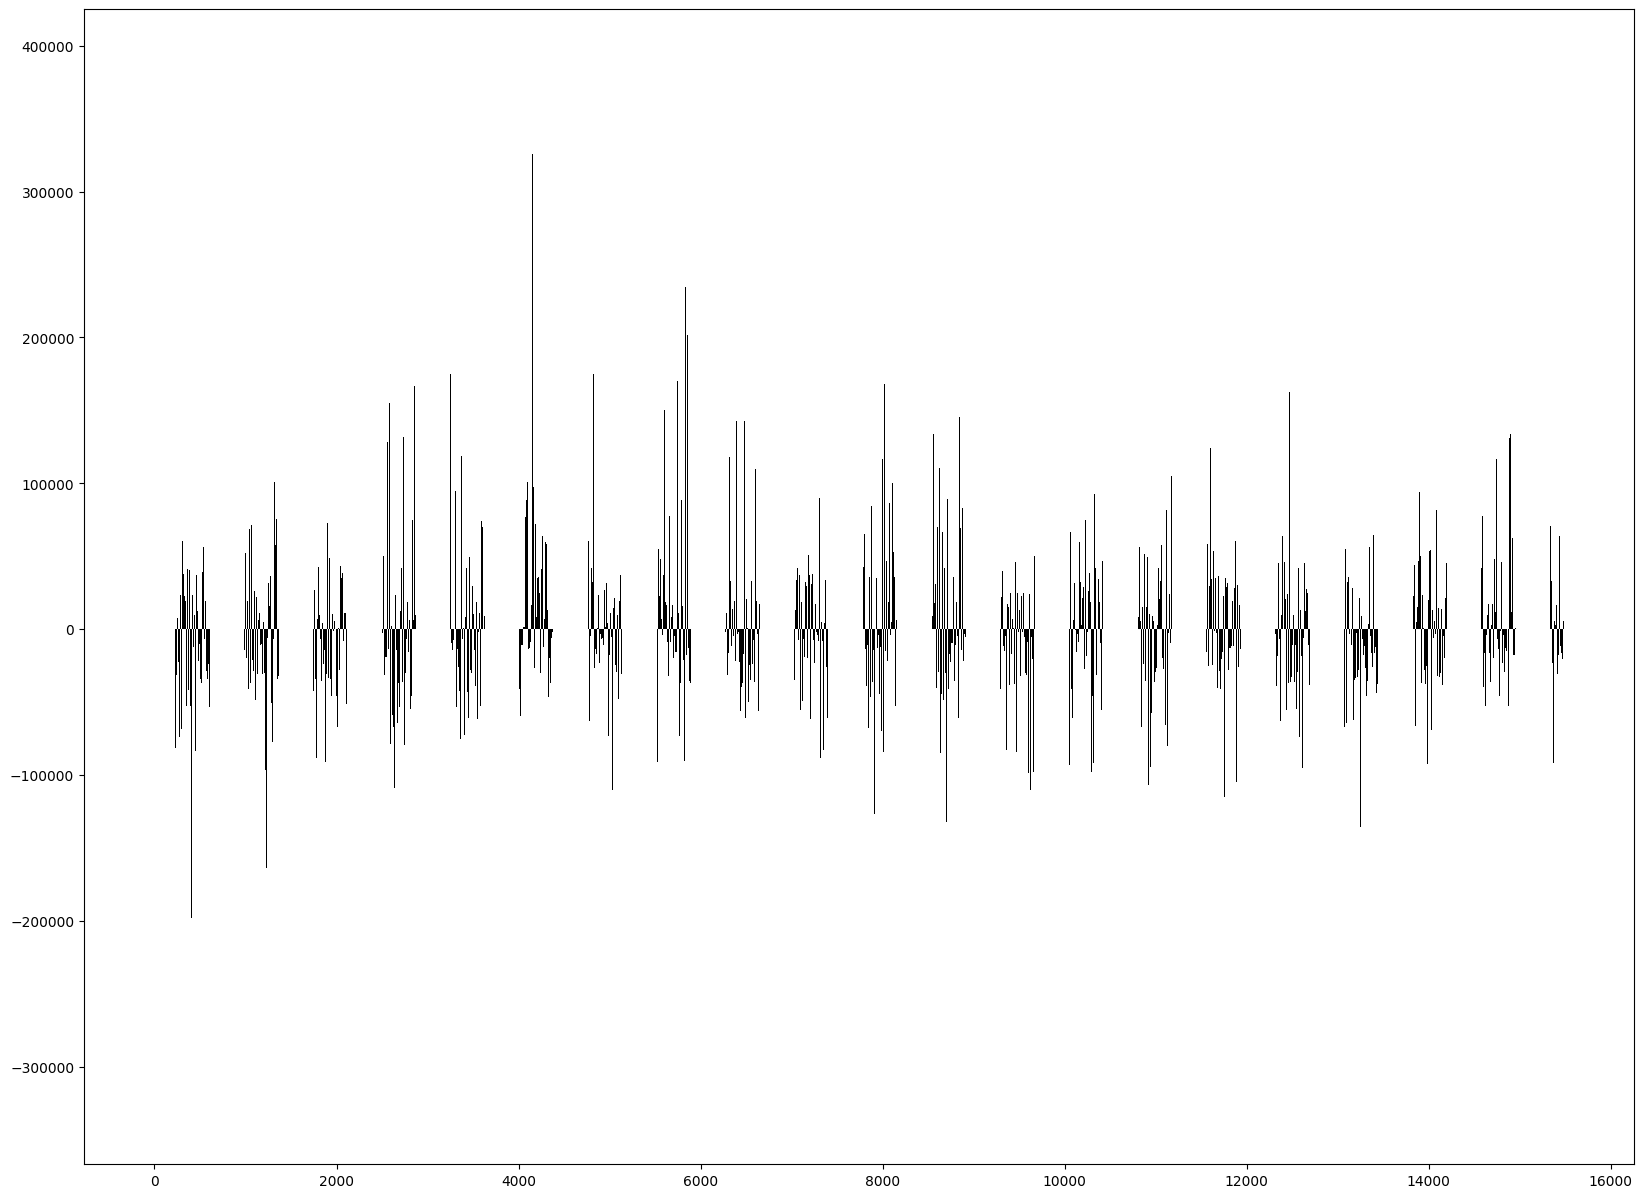

In [21]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_train, color='black', width=0.5)

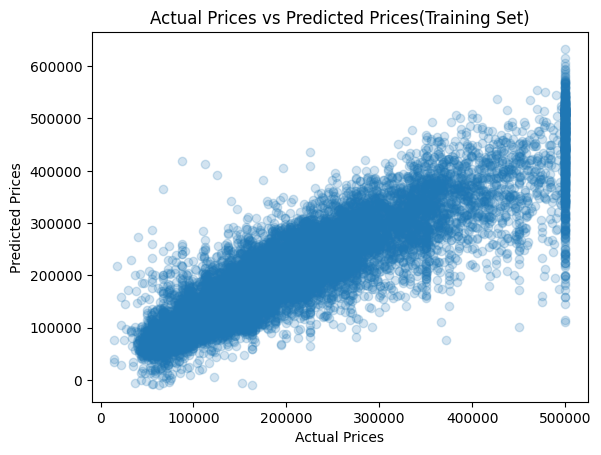

In [22]:
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Training Set)')
plt.show()

### Test set

In [23]:
performance_test['ERROR'] = performance_test['ACTUAL VALUES'] - performance_test['PREDICTIONS']
performance_test.reset_index(drop=True, inplace=True)
performance_test.reset_index(inplace=True)
performance_test

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,136900.0,110835.420406,26064.579594
1,1,241300.0,260079.950411,-18779.950411
2,2,200700.0,151070.483864,49629.516136
3,3,72500.0,75438.653313,-2938.653313
4,4,460000.0,352822.996644,107177.003356
...,...,...,...,...
5155,5155,121200.0,80477.371159,40722.628841
5156,5156,137500.0,202869.314986,-65369.314986
5157,5157,160900.0,234399.213957,-73499.213957
5158,5158,227300.0,282601.824372,-55301.824372


<BarContainer object of 5160 artists>

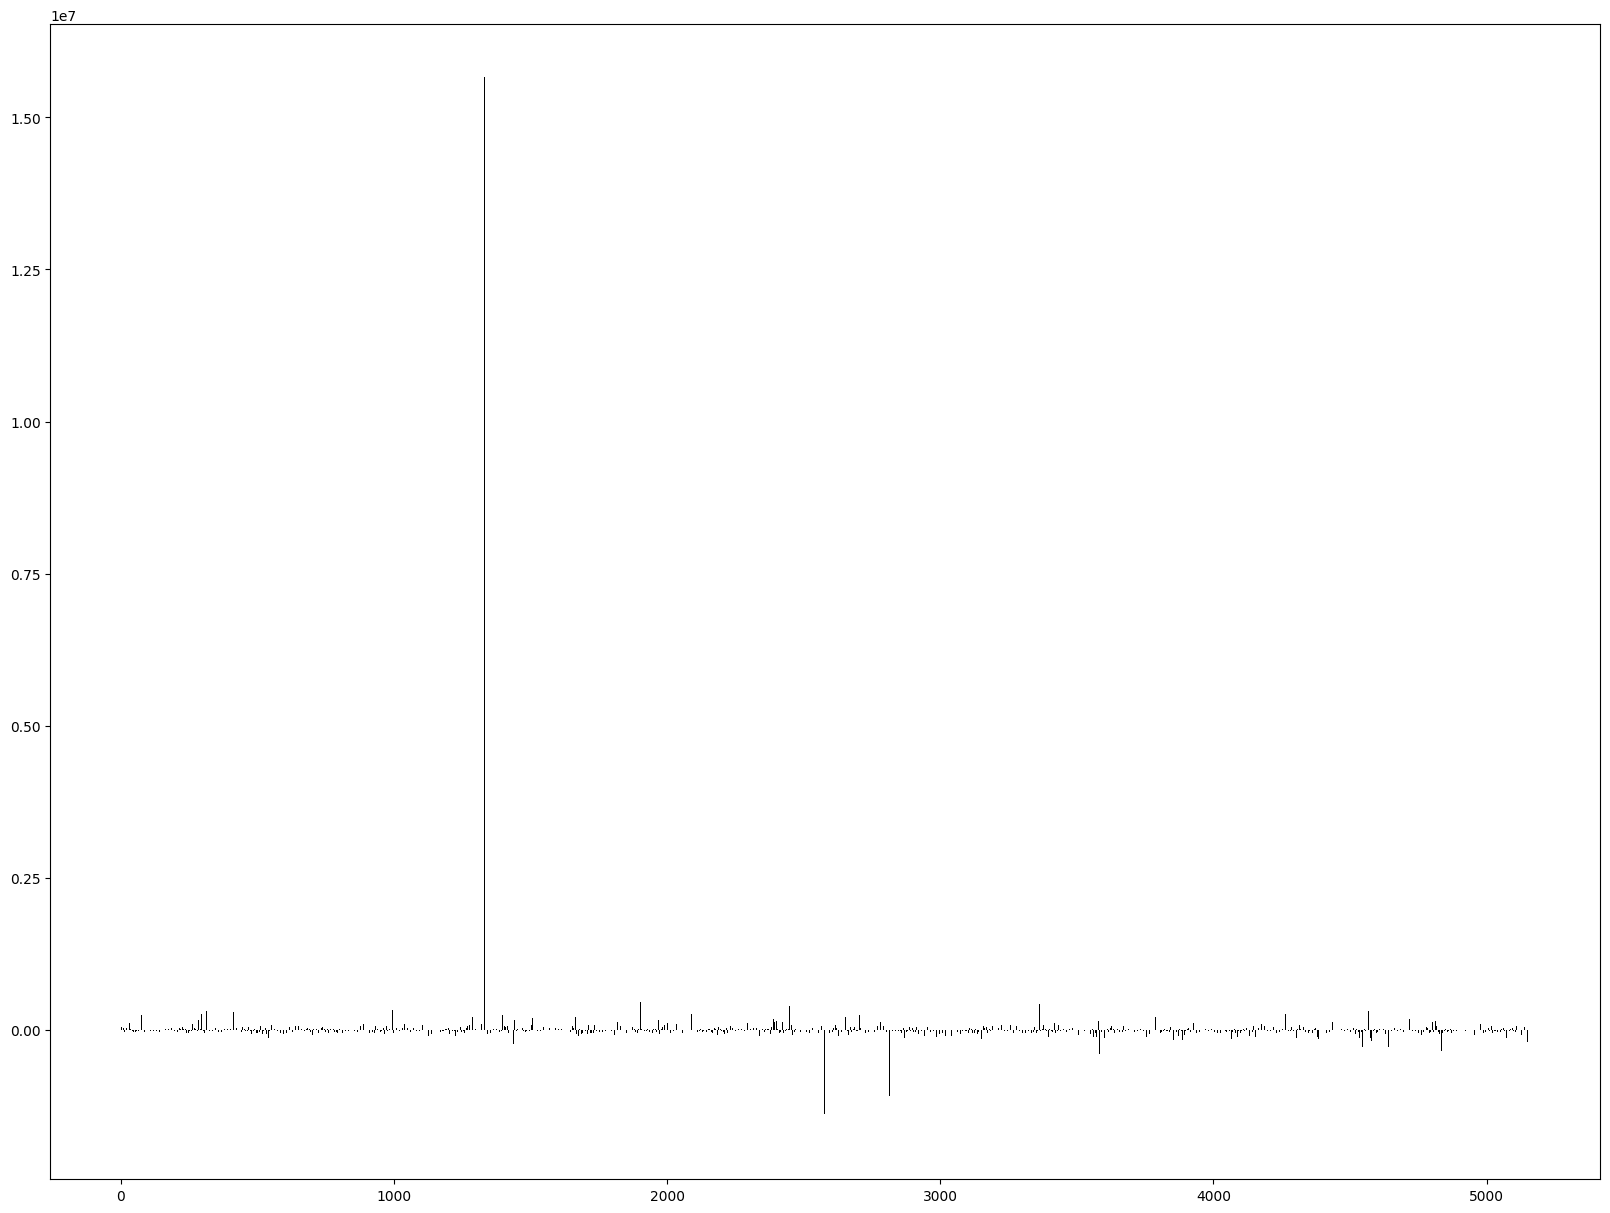

In [24]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_test, color='black', width=0.5)

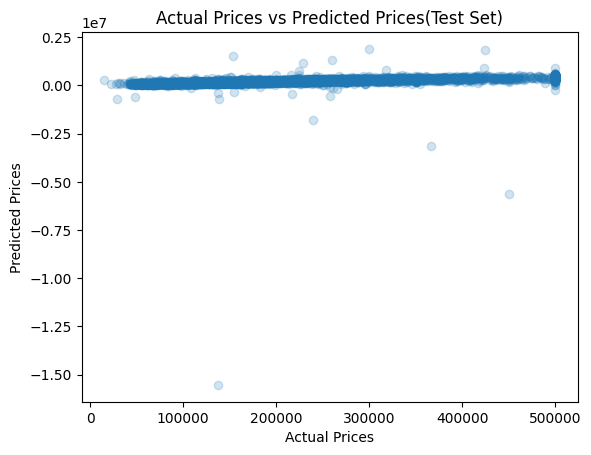

In [25]:
plt.scatter(y_test, y_pred_test, alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Test Set)')
plt.show()